In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

In [4]:
df = pd.read_csv("credit_card_transactions.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [6]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

df["hour"] = df["trans_date_trans_time"].dt.hour
df["day"] = df["trans_date_trans_time"].dt.day
df["month"] = df["trans_date_trans_time"].dt.month

In [7]:
df['age'] = (pd.to_datetime('today') - pd.to_datetime(df['dob'])).dt.days // 365

In [8]:
cat_col = ["merchant", "category", "gender", "job", "state"]
encoders = {}
for col in cat_col:
    encoders[col]=LabelEncoder()
    df[col]=encoders[col].fit_transform(df[col])

In [9]:
drop_columns = ["Unnamed: 0", "cc_num", "unix_time", "trans_date_trans_time", "first", "last", "street", "city", "zip", "dob", "trans_num", "merch_zipcode"]
df = df.drop(columns=drop_columns)
df.head()

,merchant,category,amt,gender,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,day,month,age
0,514,8,4.97,0,27,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,0,1,1,37
1,241,4,107.23,0,47,48.8878,-118.2105,149,428,49.159047,-118.186462,0,0,1,1,47
2,390,0,220.11,1,13,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,0,1,1,64
3,360,2,45.00,1,26,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,0,1,1,59
4,297,9,41.96,1,45,38.4207,-79.4629,99,116,38.674999,-78.632459,0,0,1,1,39


In [10]:
features = ["merchant", "category", "amt", "job", "age", "hour", "day", "month", "gender", "state", "city_pop", "lat", "long", "merch_lat", "merch_long"]
x = df[features]
y = df["is_fraud"]

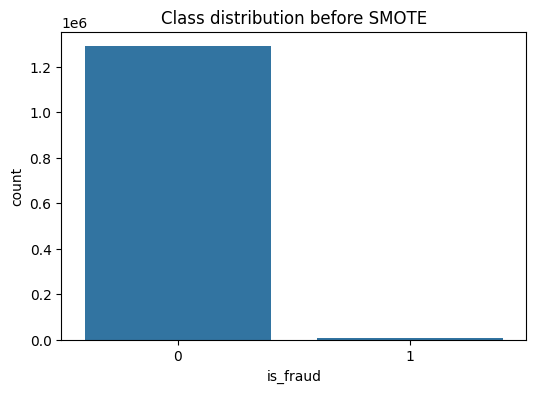

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x="is_fraud", data=df)
plt.title("Class distribution before SMOTE")
plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [13]:
smote = SMOTE(random_state=0)

In [14]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

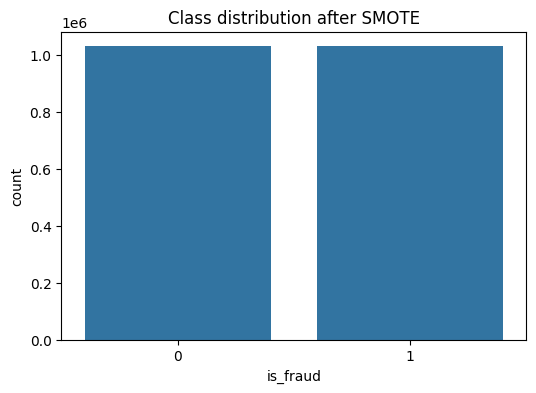

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title("Class distribution after SMOTE")
plt.show()

In [16]:
model = RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)     

In [17]:
model.fit(x_train_resampled, y_train_resampled)

,n_estimators,250
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_pred = model.predict(x_test)

In [19]:
print("Classification report: \n", classification_report(y_test, y_pred))
print("Roc AUC Score: ", roc_auc_score(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.74      0.84      0.78      1501

    accuracy                           1.00    259335
   macro avg       0.87      0.92      0.89    259335
weighted avg       1.00      1.00      1.00    259335

Roc AUC Score:  0.9181832487575723


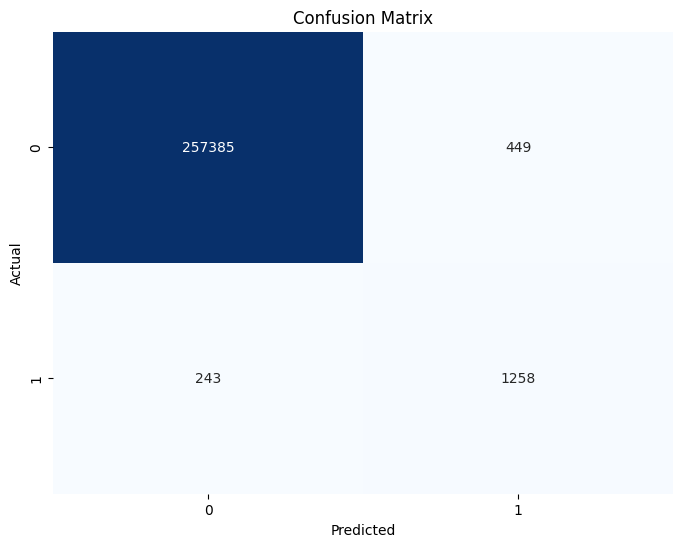

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

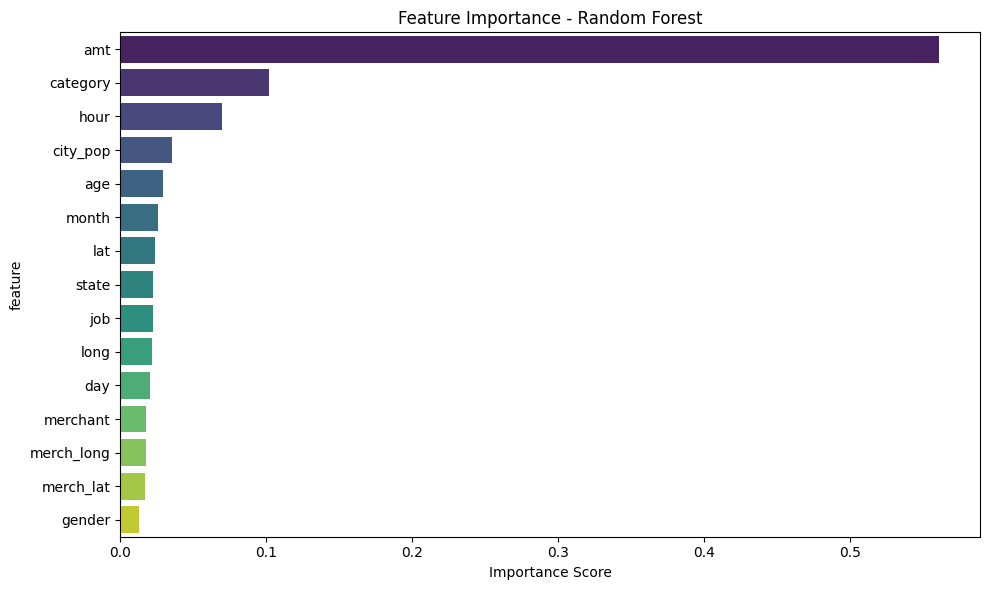


Top 5 Most Important Features:
     feature  importance
2        amt    0.561275
1   category    0.102298
5       hour    0.069676
10  city_pop    0.035506
4        age    0.029175


In [21]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', hue='feature', palette='viridis', legend=False)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

In [22]:
joblib.dump(model, 'fraud_detection_model.pkl')
joblib.dump(encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [23]:
decoded_x_test = x_test.copy()
for col in cat_col:
    decoded_x_test[col] = encoders[col].inverse_transform(x_test[col])

In [24]:
test_data = decoded_x_test.copy()
test_data["is_fraud"] = y_test.values

fraud_samples = test_data[test_data["is_fraud"] == 1]
legit_samples = test_data[test_data["is_fraud"] == 0]

fraud_samples = fraud_samples.drop(columns="is_fraud")
legit_samples = legit_samples.drop(columns="is_fraud")

fraud_samples.to_csv("fraud_samples.csv", index=False)
legit_samples.to_csv("legit_samples.csv", index=False)